# Импорт разного

In [ ]:
from google.colab import files
import numpy as np

import matplotlib.pyplot as plt

import re

import pandas as pd

# Загрузка файлов

Плюс сразу Генерим Фичи

In [ ]:
uploaded = files.upload()


Saving log.csv to log.csv
Saving sample_solution.csv to sample_solution.csv
Saving site_ohe_count.csv to site_ohe_count.csv
Saving train_dataset_train.csv to train_dataset_train.csv
Saving type_contract.csv to type_contract.csv
Saving url_count.csv to url_count.csv
Saving url_dom_stat.csv to url_dom_stat.csv
Saving url_len_stat.csv to url_len_stat.csv


In [ ]:
df_sample_solution = pd.read_csv("/content/sample_solution.csv")

In [ ]:
df_train = pd.read_csv("/content/train_dataset_train.csv")


df_type_contract = pd.read_csv("/content/type_contract.csv")
df_log = pd.read_csv("/content/log.csv")

Для данных по статистике длины url 

*   Заполняем 0 все пропуски
*   Добавляем коэффициент вариации (СКО / Медиану)
*   Добовляем вариационный размах (максимум - минимум)



In [ ]:
df_url_len_stat = pd.read_csv("/content/url_len_stat.csv")
df_url_len_stat = df_url_len_stat.fillna(0)
df_url_len_stat['cv'] = df_url_len_stat['std'] / df_url_len_stat['median']
df_url_len_stat['vr'] = df_url_len_stat['max'] - df_url_len_stat['min']
df_url_len_stat

,contract_id,median,std,min,max,cv,vr
0,3455,13.0,6.773777,8,29,0.521060,21
1,3458,9.0,0.000000,9,9,0.000000,0
2,3459,50.0,7.071068,45,55,0.141421,10
3,3460,13.0,1.264911,13,16,0.097301,3
4,3461,9.0,0.000000,9,9,0.000000,0
...,...,...,...,...,...,...,...
196143,271820,50.0,7.071068,45,55,0.141421,10
196144,272061,17.0,9.808160,9,29,0.576951,20
196145,273472,13.0,0.000000,13,13,0.000000,0
196146,273538,11.0,22.387497,9,55,2.035227,46


Для данных по статистике доменов в url 



*   Заполняем 0 все пропуски
*   Добавляем коэффициент вариации (СКО / Медиану)
*   Добовляем вариационный размах (максимум - минимум)



In [ ]:
df_url_dom_stat = pd.read_csv("/content/url_dom_stat.csv")
df_url_dom_stat = df_url_dom_stat.fillna(0)
df_url_dom_stat['cv'] = df_url_dom_stat['std'] / df_url_dom_stat['median']
df_url_dom_stat['vr'] = df_url_dom_stat['max'] - df_url_dom_stat['min']
df_url_dom_stat

,contract_id,median,std,min,max,cv,vr
0,3455,3.0,0.883627,2,5,0.294542,3
1,3458,3.0,0.000000,3,3,0.000000,0
2,3459,7.5,0.707107,7,8,0.094281,1
3,3460,3.0,0.000000,3,3,0.000000,0
4,3461,3.0,0.000000,3,3,0.000000,0
...,...,...,...,...,...,...,...
196143,271820,7.5,0.707107,7,8,0.094281,1
196144,272061,4.0,1.000000,3,5,0.250000,2
196145,273472,3.0,0.000000,3,3,0.000000,0
196146,273538,3.0,2.489980,3,8,0.829993,5


Для статистики посещения сайтов (предпоследний домен)

* убираем самые редкие домены (которые в итоге встречаются реже чем 100 раз по выборке)

In [ ]:
df_site_ohe_count = pd.read_csv("/content/site_ohe_count.csv")
df_site_ohe_count_pop = df_site_ohe_count.loc[:,df_site_ohe_count.sum()>100]
df_site_ohe_count_pop

,contract_id,site_1,site_2,site_6,site_8,site_9,site_11,site_12,site_14
0,3455,0.0,0.0,0.0,5.0,0.0,19.0,0.0,0.0
1,3458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3459,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,3460,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
4,3461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
196143,271820,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
196144,272061,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
196145,273472,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196146,273538,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0


Просто загружаем

In [ ]:
df_url_count = pd.read_csv("/content/url_count.csv")
df_url_count

,contract_id,url
0,3455,24
1,3458,1
2,3459,2
3,3460,10
4,3461,1
...,...,...
196143,271820,2
196144,272061,5
196145,273472,1
196146,273538,5


Для логов с датой

* с помощью функции pandas переводим в единый формат
* добавляем признак "день года"

In [ ]:
df_log["event_date"] = pd.to_datetime(df_log["event_date"], 
                            format = '%Y-%m-%d')
df_log["event_date_day"] = pd.DatetimeIndex(df_log["event_date"]).dayofyear
df_log

,contract_id,event_date,event_type,event_date_day
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров,87
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах,87
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета,87
3,36294,2021-03-28 16:29:56,Включение IPTV-пакета,87
4,36294,2021-03-28 16:35:04,Обращение в службу заботы о клиентах,87
...,...,...,...,...
25269,11801,2021-04-29 07:50:44,Информер ВК. Показ,119
25270,54405,2021-03-17 10:38:42,Информер ВК. Показ,76
25271,54405,2021-03-23 08:21:29,Информер ВК. Показ,82
25272,54405,2021-04-09 13:04:26,Информер ВК. Показ,99


Функция, которая генерит one-hot представление столбца 

In [ ]:
def get_one_hot_encoding(dataset, features):
    temp = [pd.get_dummies(dataset[feature], prefix = feature) for feature in features]
    ohe_df = pd.concat(temp, axis = 1)
    return ohe_df

Для логов генерируем one-hot представление различных событий

In [ ]:
df_log_ohe = get_one_hot_encoding(df_log, ['event_type']).join(df_log["contract_id"])
df_log_ohe

,event_type_Абонент оставил отзыв в Личном кабинете,event_type_Активация ГП с IVR,event_type_Активация автоматического гарантированного платежа,event_type_Активация гарантированного платежа,event_type_Активация точки подключения на сутки,event_type_Без границ бесплатно. Включение,event_type_Без границ бесплатно. Отключение,event_type_Без границ платно. Включение,event_type_Без границ платно. Отключение,event_type_Блокировка,...,event_type_Турбокнопка платно (1 час),event_type_Уведомления: отключение,event_type_Уведомления: подключение,event_type_Уведомления: подтверждение,event_type_Удаление ip-адреса,event_type_Удаление из Обращались с номеров,event_type_Удаление телефона из записи,event_type_Футболка Ситилинк,event_type_Чек лист выполненных работ при регистрации,contract_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36294
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36294
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36294
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36294
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11801
25270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54405
25271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54405
25272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54405


In [ ]:
columns = [x for x in df_log_ohe.columns]

Отдельно ищем колонки в которые есть "что-то про **включение**" и "что-то про **отключение**"

In [ ]:
on_list = []
off_list = []
for x in columns:
    if 'вкл' in x.lower():
        on_list.append(x)

    if 'откл' in x.lower():
        off_list.append(x)


In [ ]:
on_list

['event_type_Без границ бесплатно. Включение',
 'event_type_Без границ платно. Включение',
 'event_type_Виртуальное бессмертие. Включение',
 'event_type_Включена 10% скидка',
 'event_type_Включена 20% скидка',
 'event_type_Включена 30% скидка',
 'event_type_Включение IPTV-пакета',
 'event_type_Включение Бесплатной аренды',
 'event_type_Включение автоматической активации ГП',
 'event_type_Включение блокировки лицевого счета',
 'event_type_Включение интернета на 20 минут',
 'event_type_Включение интернета на 20 минут с IVR',
 'event_type_Включение ограничения функций ТВ',
 'event_type_Включение старых условий аренды',
 'event_type_Включение управления услугами по паролю',
 'event_type_Включение услуги Аренда ТВ-приставки',
 'event_type_Подписка на ivi. Включение триала',
 'event_type_Родительский контроль. Включение']

In [ ]:
off_list

Выделяем те, у которых есть "пара"

In [ ]:
np.array(on_list)[[0,1,2,3,4,5,9,12,14,15]]

array(['event_type_Без границ бесплатно. Включение',
       'event_type_Без границ платно. Включение',
       'event_type_Виртуальное бессмертие. Включение',
       'event_type_Включена 10% скидка', 'event_type_Включена 20% скидка',
       'event_type_Включена 30% скидка',
       'event_type_Включение блокировки лицевого счета',
       'event_type_Включение ограничения функций ТВ',
       'event_type_Включение управления услугами по паролю',
       'event_type_Включение услуги Аренда ТВ-приставки'], dtype='<U50')

In [ ]:
np.array(off_list)[[0,1,2,4,5,6,7,8,10,11]]

array(['event_type_Без границ бесплатно. Отключение',
       'event_type_Без границ платно. Отключение',
       'event_type_Виртуальное бессмертие. Отключение',
       'event_type_Отключение автоматической активации ГП',
       'event_type_Отключение скидки', 'event_type_Отключение скидки 10%',
       'event_type_Отключение скидки 20%',
       'event_type_Отключение управления услугами по паролю',
       'event_type_Отключение услуги Аренда ТВ-приставки',
       'event_type_Подписка на ivi. Отключение автопродления подписки'],
      dtype='<U61')

Считаем (построчно) сколько всего было событий связанных с отключением

In [ ]:
df_log_ohe['off'] = df_log_ohe.loc[:,off_list].sum(axis = 1)

Считаем (построчно) сколько всего было событий связанных с выключением

In [ ]:
df_log_ohe['on'] = df_log_ohe.loc[:,on_list].sum(axis = 1)

Считаем (построчно) баланс, включение и отключения

In [ ]:
df_log_ohe['on/off'] = df_log_ohe.loc[:,np.array(off_list)[[0,1,2,4,5,6,7,8,10,11]]].sum(axis = 1) - df_log_ohe.loc[:,np.array(on_list)[[0,1,2,3,4,5,9,12,14,15]]].sum(axis = 1)

Объединяем таблички (здесь как в baseline примере)

In [ ]:
df_test = pd.merge(df_sample_solution, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")
df_test

,contract_id,blocked,day_or_month_contract
0,3453,0,0
1,3454,0,1
2,3455,0,1
3,3456,0,0
4,3457,0,0
...,...,...,...
809,4258,0,1
810,4259,0,1
811,4260,0,0
812,4261,0,0


In [ ]:
df_train = pd.merge(df_train, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")
df_train

,contract_id,blocked,day_or_month_contract
0,7780,0,0.0
1,7785,0,0.0
2,7794,0,0.0
3,7795,0,1.0
4,7798,0,0.0
...,...,...,...
5988,274601,1,1.0
5989,274710,1,0.0
5990,274782,1,0.0
5991,274786,1,1.0


По аналогии с примером из baseline считаем сумму событий связанных с конкретным  `contract_id` (`gropby` и `sum()`) 

In [ ]:
sum_log = df_log_ohe.groupby("contract_id").sum()

sum_log

,event_type_Абонент оставил отзыв в Личном кабинете,event_type_Активация ГП с IVR,event_type_Активация автоматического гарантированного платежа,event_type_Активация гарантированного платежа,event_type_Активация точки подключения на сутки,event_type_Без границ бесплатно. Включение,event_type_Без границ бесплатно. Отключение,event_type_Без границ платно. Включение,event_type_Без границ платно. Отключение,event_type_Блокировка,...,event_type_Уведомления: подключение,event_type_Уведомления: подтверждение,event_type_Удаление ip-адреса,event_type_Удаление из Обращались с номеров,event_type_Удаление телефона из записи,event_type_Футболка Ситилинк,event_type_Чек лист выполненных работ при регистрации,off,on,on/off
contract_id,,,,,,,,,,,,,,,,,,,,,
3453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
274710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
274782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1


Находим первый день обращений для `contract_id` (`gropby` и `min()`) 

In [ ]:
min_log = df_log[['event_date_day',"contract_id"]].groupby("contract_id").min()

min_log

,event_date_day
contract_id,
3453,62
3454,118
3456,80
3457,68
3458,60
...,...
274601,110
274710,110
274782,105


Находим последний день обращений для `contract_id` (`gropby` и `max()`) 

In [ ]:
max_log = df_log[['event_date_day',"contract_id"]].groupby("contract_id").max()

max_log

,event_date_day
contract_id,
3453,62
3454,118
3456,80
3457,119
3458,119
...,...
274601,110
274710,110
274782,112


Считаем сколько было обращений для каждого `contract_id` (`gropby` и `count()`) 

In [ ]:
count_log = df_log[['event_date',"contract_id"]].groupby("contract_id").count()

count_log

,event_date
contract_id,
3453,1
3454,1
3456,4
3457,4
3458,23
...,...
274601,6
274710,7
274782,8


Объединяем все по `contract_id` для тренировочной и тестовой выборки

In [ ]:
df_train = pd.merge(df_train, count_log , on="contract_id", how='left')
df_train = pd.merge(df_train, max_log , on="contract_id", how='left')
df_train = pd.merge(df_train, min_log , on="contract_id", how='left')
df_train = pd.merge(df_train, sum_log , on="contract_id", how='left')

df_train = pd.merge(df_train, df_url_dom_stat , on="contract_id", how='left')
df_train = pd.merge(df_train, df_site_ohe_count_pop , on="contract_id", how='left')
df_train = pd.merge(df_train, df_url_len_stat , on="contract_id", how='left')
df_train = pd.merge(df_train, df_url_count , on="contract_id", how='left')

df_train['diff'] = df_train['event_date_day_x'] - df_train['event_date_day_y']


In [ ]:
df_test = pd.merge(df_test, count_log , on="contract_id", how='left')
df_test = pd.merge(df_test, max_log , on="contract_id", how='left')
df_test = pd.merge(df_test, min_log , on="contract_id", how='left')
df_test = pd.merge(df_test, sum_log , on="contract_id", how='left')

df_test = pd.merge(df_test, df_url_dom_stat , on="contract_id", how='left')
df_test = pd.merge(df_test, df_site_ohe_count_pop , on="contract_id", how='left')
df_test = pd.merge(df_test, df_url_len_stat , on="contract_id", how='left')
df_test = pd.merge(df_test, df_url_count , on="contract_id", how='left')


df_test['diff'] = df_test['event_date_day_x'] - df_test['event_date_day_y']


In [ ]:
df_test

,contract_id,blocked,day_or_month_contract,event_date,event_date_day_x,event_date_day_y,event_type_Абонент оставил отзыв в Личном кабинете,event_type_Активация ГП с IVR,event_type_Активация автоматического гарантированного платежа,event_type_Активация гарантированного платежа,...,site_12,site_14,median_y,std_y,min_y,max_y,cv_y,vr_y,url,diff
0,3453,0,0,1.0,62.0,62.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,3454,0,1,1.0,118.0,118.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,3455,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,13.0,6.773777,8.0,29.0,0.521060,21.0,24.0,NaN
3,3456,0,0,4.0,80.0,80.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,3457,0,0,4.0,119.0,68.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,4258,0,1,3.0,107.0,60.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
806,4259,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,12.0,2.215458,8.0,16.0,0.184621,8.0,484.0,NaN
807,4260,0,0,3.0,113.0,75.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,4.841946,11.0,23.0,0.284820,12.0,9.0,38.0
808,4261,0,0,18.0,90.0,88.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


# Про обучение модели

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
def calculate_recall(model_pipe, X, y):
    """Расчет коэффициента R2. 
    
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    """
    y_model = model_pipe.predict(X)
    return recall_score(y, y_model, average ='macro' )

In [ ]:
from sklearn.utils import class_weight

In [ ]:
def fit_train_val(pipe, X_train, y_train, X_val, y_val, pow = 1):

    classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)

    pipe.fit(X_train, y_train,
             sample_weight=classes_weights**pow,)

    print(f"Train recall: {calculate_recall(pipe, X_train, y_train):.4f}")

    print(f"Val recall: {calculate_recall(pipe, X_val, y_val):.4f}")

    return pipe

In [ ]:
def final_prediction(pipe, X_train, y_train, X_test, Submission, pow = 1):
    classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train)

    pipe.fit(X_train, y_train, 
             sample_weight=classes_weights**pow,)

    Submission['blocked'] = pipe.predict(X_test)

    return Submission

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import OrdinalEncoder


# Реализуем предварительную обработку через Pipeline


In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

Предобработка числовых данных (вставление пропусков + нормализация)

**SimpleImputer** - заменяет пропуски на значения
возможные стратегии (strategy)


*   constant - какое-то конкретное значение (параметр fill_value='missing')

В данном слачае пропуски заполняем `-1` чтобы пометить тех, кто "не обращался в тех поддержку



In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = -1)),
])

Предобработка категориальных данных (вставление пропусков + Порядковое кодирование)

In [ ]:
categorical_pipe_tree = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent' )),
    ('encoder', OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=-1, ))
])

In [ ]:
DFs = [df_train, df_test]

Разбираемся с типами колонок

Чтобы потом в pipeline все аккуратно сложить

In [ ]:
for df in DFs:
    df['blocked'] = df['blocked'].astype('category')
    df['day_or_month_contract'] = df['day_or_month_contract'].astype('category')

In [ ]:
cat_columns = []
num_columns = []

for column_name in df_test.columns:
    if (df_test[column_name].dtype.name == 'category'):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['blocked', 'day_or_month_contract'] 
 len =  2
numerical columns:	  ['contract_id', 'event_date', 'event_date_day_x', 'event_date_day_y', 'event_type_Абонент оставил отзыв в Личном кабинете', 'event_type_Активация ГП с IVR', 'event_type_Активация автоматического гарантированного платежа', 'event_type_Активация гарантированного платежа', 'event_type_Активация точки подключения на сутки', 'event_type_Без границ бесплатно. Включение', 'event_type_Без границ бесплатно. Отключение', 'event_type_Без границ платно. Включение', 'event_type_Без границ платно. Отключение', 'event_type_Блокировка', 'event_type_Блокировка лицевого счета', 'event_type_Бонус-скорость', 'event_type_Виртуальное бессмертие. Включение', 'event_type_Виртуальное бессмертие. Использование', 'event_type_Виртуальное бессмертие. Отключение', 'event_type_Включена 10% скидка', 'event_type_Включена 20% скидка', 'event_type_Включена 30% скидка', 'event_type_Включение IPTV-пакета', 'event_type_Включение Бес

В качестве признаков на не нужен Статус

И c`ontract_id`

In [ ]:
cat_columns.pop(0)

'blocked'

In [ ]:
num_columns.pop(0)

'contract_id'

In [ ]:
preprocessors_tree = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe_tree, cat_columns)
])

Применяем pipeline 

In [ ]:
preprocessors_tree.fit(df_train.copy())
X_train = preprocessors_tree.transform(df_train.copy())
X_test = preprocessors_tree.transform(df_test.copy())

y_train = df_train['blocked']

In [ ]:
random_state = 42

In [ ]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size = 0.2,
                                                    random_state = random_state,
                                                    stratify = y_train)

# В качестве модели будет **CatBoost**

Устанавливаем

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, average_precision_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, auc

In [ ]:
import seaborn as sns

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
features_names = np.hstack([num_columns, cat_columns])


In [ ]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train_)
train = pd.DataFrame(X_train_, columns= features_names)
for i in cat_columns:
    train[i]=train[i].astype(int)
train_data = Pool(
    data=train, 
    label=y_train_,
    weight=classes_weights**0.5,
                           cat_features = cat_columns
)

classes_weights_val = class_weight.compute_sample_weight(class_weight='balanced',y=y_val)

val = pd.DataFrame(X_val, columns= features_names)
for i in cat_columns:
    val[i]=val[i].astype(int)
eval_data = Pool(
    data=val,
    label=y_val,
    weight=classes_weights_val**0.5,
                           cat_features = cat_columns
)



In [ ]:
model = CatBoostClassifier(iterations = 1000,
                           early_stopping_rounds=100,
                           verbose = 100
                           )



**делаем "хоть какой-то прогон"** модели


на произвольных гиперпараметрах 

In [ ]:
model.fit(X=train_data, eval_set=eval_data)

Learning rate set to 0.046668
0:	learn: 0.6722590	test: 0.6724675	best: 0.6724675 (0)	total: 7.47ms	remaining: 7.46s
100:	learn: 0.4304202	test: 0.4741516	best: 0.4741516 (100)	total: 713ms	remaining: 6.35s
200:	learn: 0.3888868	test: 0.4656820	best: 0.4647772 (194)	total: 1.41s	remaining: 5.62s
300:	learn: 0.3426891	test: 0.4608703	best: 0.4599295 (292)	total: 2.12s	remaining: 4.91s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4599294853
bestIteration = 292

Shrink model to first 293 iterations.


Смотрим на значимость признаков, чтобы понять, какие использовать в дальнейшей итоговой модели 



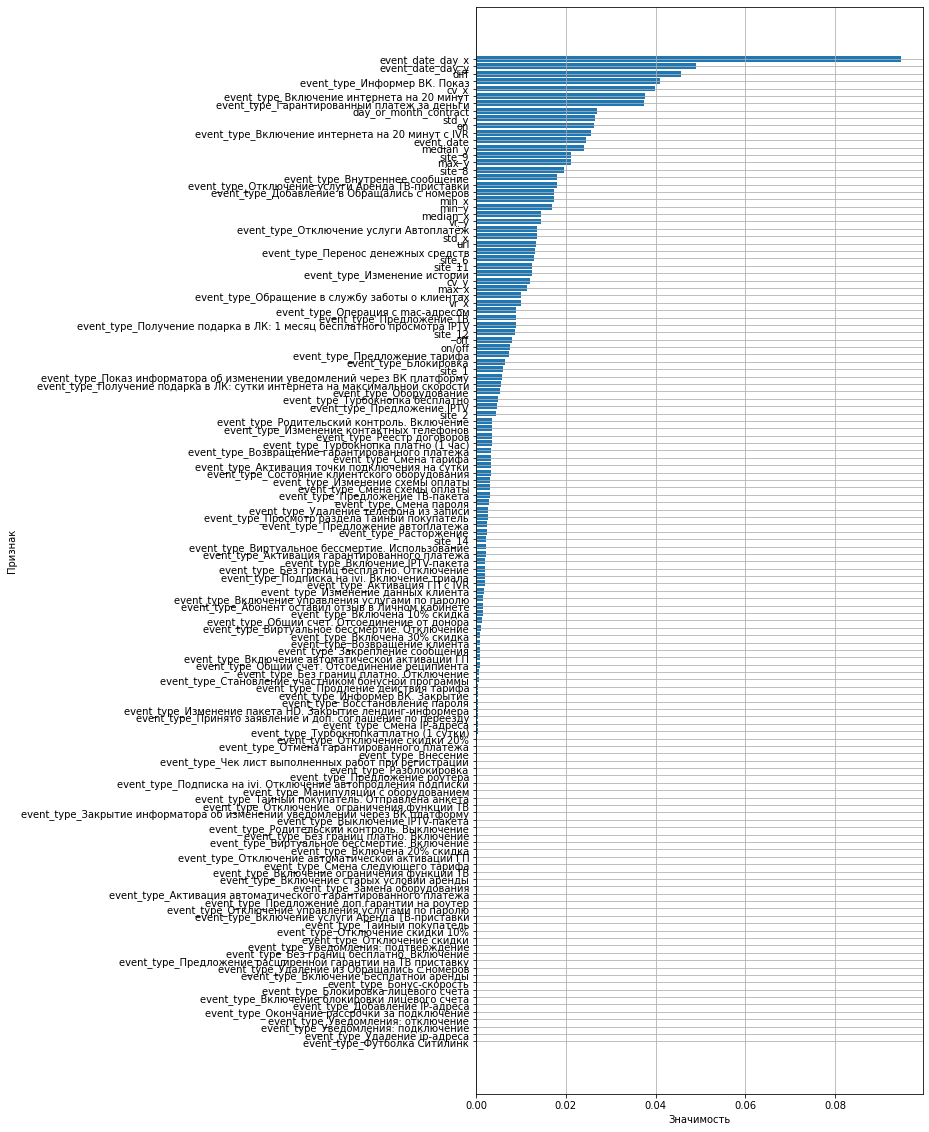

In [ ]:
feature_importance = model.feature_importances_/np.sum(model.feature_importances_)
features_names = np.hstack([num_columns, cat_columns])
sorted = np.argsort(feature_importance)

ypos = np.arange(len(features_names))

fig= plt.figure(figsize=(8,20))
plt.barh(ypos, feature_importance[sorted])
plt.ylabel('Признак')
plt.xlabel('Значимость')
plt.grid()
plt.yticks(ypos,features_names[sorted] );

In [ ]:
features_names = np.hstack([num_columns, cat_columns])

features_names[feature_importance>0.001]

# Выбираем лучшие признаки по feature_importance

In [ ]:
num_columns_2 = ['event_date', 'event_date_day_x', 'event_date_day_y',
       'event_type_Абонент оставил отзыв в Личном кабинете',
       'event_type_Активация ГП с IVR',
       'event_type_Активация гарантированного платежа',
       'event_type_Активация точки подключения на сутки',
       'event_type_Без границ бесплатно. Отключение',
       'event_type_Блокировка',
       'event_type_Виртуальное бессмертие. Использование',
       'event_type_Виртуальное бессмертие. Отключение',
       'event_type_Включена 10% скидка',
       'event_type_Включение IPTV-пакета',
       'event_type_Включение интернета на 20 минут',
       'event_type_Включение интернета на 20 минут с IVR',
       'event_type_Включение управления услугами по паролю',
       'event_type_Внутреннее сообщение',
       'event_type_Возвращение гарантированного платежа',
       'event_type_Гарантированный платеж за деньги',
       'event_type_Добавление в Обращались с номеров',
       'event_type_Изменение данных клиента',
       'event_type_Изменение истории',
       'event_type_Изменение контактных телефонов',
       'event_type_Изменение схемы оплаты',
       'event_type_Информер ВК. Показ', 'event_type_Оборудование',
       'event_type_Обращение в службу заботы о клиентах',
       'event_type_Общий счет. Отсоединение от донора',
       'event_type_Операция с mac-адресом',
       'event_type_Отключение услуги Автоплатёж',
       'event_type_Отключение услуги Аренда ТВ-приставки',
       'event_type_Перенос денежных средств',
       'event_type_Подписка на ivi. Включение триала',
       'event_type_Показ информатора об изменении уведомлений через ВК платформу',
       'event_type_Получение подарка в ЛК: 1 месяц бесплатного просмотра IPTV',
       'event_type_Получение подарка в ЛК: сутки интернета на максимальной скорости',
       'event_type_Предложение IPTV', 'event_type_Предложение ТВ',
       'event_type_Предложение ТВ-пакета',
       'event_type_Предложение автоплатежа',
       'event_type_Предложение тарифа',
       'event_type_Просмотр раздела Тайный покупатель',
       'event_type_Расторжение', 'event_type_Реестр договоров',
       'event_type_Родительский контроль. Включение',
       'event_type_Смена пароля', 'event_type_Смена схемы оплаты',
       'event_type_Смена тарифа',
       'event_type_Состояние клиентского оборудования',
       'event_type_Турбокнопка бесплатно',
       'event_type_Турбокнопка платно (1 час)',
       'event_type_Удаление телефона из записи', 'off', 'on', 'on/off',
       'median_x', 'std_x', 'min_x', 'max_x', 'cv_x', 'vr_x', 'site_1',
       'site_2', 'site_6', 'site_8', 'site_9', 'site_11', 'site_12',
       'site_14', 'median_y', 'std_y', 'min_y', 'max_y', 'cv_y', 'vr_y',
       'url', 'diff',
       ]
       

"Пересоберем" тренировочную и тестовую выборку

In [ ]:
preprocessors_tree = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns_2),
    ('cat', categorical_pipe_tree, cat_columns)
])

In [ ]:
preprocessors_tree.fit(df_train.copy())
X_train = preprocessors_tree.transform(df_train.copy())
X_test = preprocessors_tree.transform(df_test.copy())

y_train = df_train['blocked']

In [ ]:
random_state = 42

In [ ]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size = 0.2,
                                                    random_state = random_state,
                                                    stratify = y_train)

In [ ]:
features_names = np.hstack([num_columns_2, cat_columns])


# Итоговая модель

Тот же CatBoost, но теперь играемся с гиперпараметрами

In [ ]:
from sklearn.experimental import enable_halving_search_cv 


In [ ]:
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
np.sort(np.unique(class_weight.compute_sample_weight(class_weight='balanced',y=y_train)), )[::-1]

array([4.29226361, 0.56592369])

Гиперпараметры были подобраны в ходе применеия `HalvingGridSearchCV`

При использовании `RepeatedStratifiedKFold`

In [ ]:
scorer = make_scorer(recall_score, average='macro', zero_division = 0)
classes_weight = np.sort(np.unique(class_weight.compute_sample_weight(class_weight='balanced',y=y_train)), )


rcv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state = 0)

param_grid={
            'class_weights':[classes_weight],
            'iterations':[500],
            'grow_policy':['Lossguide'],
            'boosting_type':['Plain'],
            'learning_rate':[0.01],
            'bootstrap_type':['Bayesian'],
            'depth':[2],
            'eval_metric' : ['BalancedAccuracy'],
            #'random_state':[42]
            }

boost_CV = HalvingGridSearchCV(
            CatBoostClassifier(logging_level='Silent'),
            param_grid=param_grid,
            scoring=scorer,
            cv=rcv,
            verbose=1,
        )

boost_CV.fit(X_train, y_train)
model = boost_CV.best_estimator_
print(boost_CV.best_params_)
print(boost_CV.best_score_)

# Предсказание модели для тестовых данных

In [ ]:
df_sample_solution['blocked'] = model.predict(X_test) 

name = 'CB_Clean'
df_sample_solution.to_csv(name+'.csv',index = None)
df_sample_solution['blocked'].value_counts()/810 

0    0.719753
1    0.280247
Name: blocked, dtype: float64